
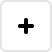
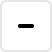
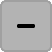
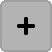
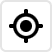
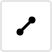
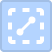
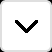
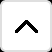
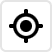
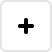
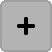
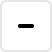
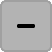
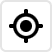
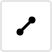
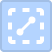
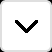
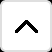
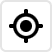

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

In [2]:
np.random.seed(42)

In [3]:
n = 50
x = np.arange(n)
y = x + np.random.normal(scale=10, size=n)


#### Default

In [4]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth(labels = smooth_labels()) 

#### This is the equivalent to

In [5]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth() + geom_stat_r2(labels = smooth_labels())

#### You can use `geom_stat_r2()` without `geom_smooth()`.

In [6]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_stat_r2(labels = smooth_labels())

#### `eq` instead default `r2`

In [7]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth(labels = smooth_labels().eq()) 

#### You can replace the left-hand side of the formula or disable it.

In [8]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth(labels = smooth_labels().eq(with_lhs = 'f(x)').eq(with_lhs = None)) 

In [9]:
n = 100
x = np.linspace(-2, 2, n)
y = x ** 2 + np.random.normal(size=n)

In [10]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + \
    geom_smooth(color='red', deg=2, se=False, labels = smooth_labels().eq(with_lhs = 'f(x)').rr(), label_x = 'center')

In [11]:
t = np.linspace(0, 1, 100)
mean = 1 + np.zeros(2)
cov = np.eye(2)
x, y = np.random.multivariate_normal(mean, cov, t.size).T
df = pd.DataFrame({'t': t, 'x': x, 'y': y})
df = df.melt(id_vars=['t'], value_vars=['x', 'y'])

In [12]:
ggplot(df, aes(x='t', y='value', group='variable')) + \
    geom_point(aes(color='variable'), size=3, alpha=.5) + \
    geom_smooth(aes(color='variable'), size=1, method='loess', span=.3, level=.7, seed=42, labels = smooth_labels().eq().rr())